# **Prelim Examination**

### **Emerging Technology 2 | CPE32S5**

Members:

Anjela Cañesa

Kenneth Gabriel A. Llave

- Choose any dataset applicable for classification and/or prediction analysis problems.

Show the application of the following algorithms:

- Linear Regression:
 - Singular LR
 - Multiple LR
 - Polynomial LR

- Logistic Regression
- Decision Tree
- Random Forest

Provide Evaluation reports for all models

In [23]:
import graphviz
import numpy as np
import pandas as pd
import seaborn as sns
from six import StringIO
from sklearn import tree
import matplotlib.pyplot as plt
from IPython.display import Image
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading a dataset from a file
from google.colab import drive
drive.mount('/content/drive')
titanic_train = pd.read_csv('/content/drive/MyDrive/titanic_train.csv')
titanic_train_linear = pd.read_csv('/content/drive/MyDrive/titanic_train_linear.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Singular Linear Regression

Mean Squared Error: 1532.035369559839
Coefficients: [0.2827528]
Intercept: 24.30367615083118


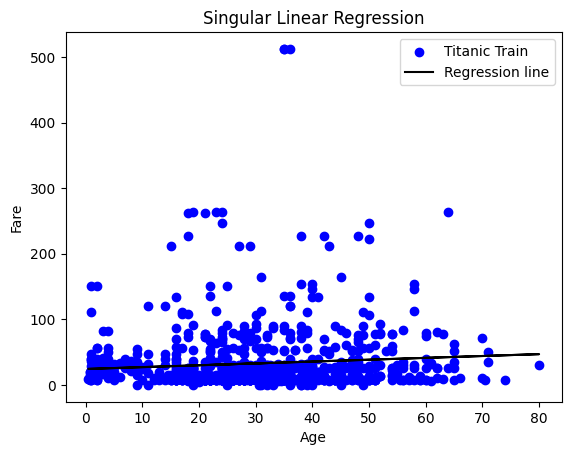

In [26]:
# Assuming you have two columns 'X' and 'y', where 'X' is the feature and 'y' is the target variable
X = titanic_train_linear[['Age']]  # Features
y = titanic_train_linear['Fare']    # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# You can also print the coefficients and intercept of the model
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Plotting the data and the regression line
plt.scatter(X, y, color='blue', label='Titanic Train')
plt.plot(X, model.predict(X), color='black', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Singular Linear Regression')
plt.legend()
plt.show()


The relationship between age and fare paid is shown in a scatter plot, where the majority of fares are concentrated at the lower end This indicates a poor correlation between the two. Age has little effect on fare based on the regression analysis with an intercept of 24.31 and a low slope coefficient of 0.2875. Considering the regression line is nearly horizontal, the Singular Linear Regression model relying solely on age may not be reliable for correctly predicting fares overall.

## Multiple Linear Regression

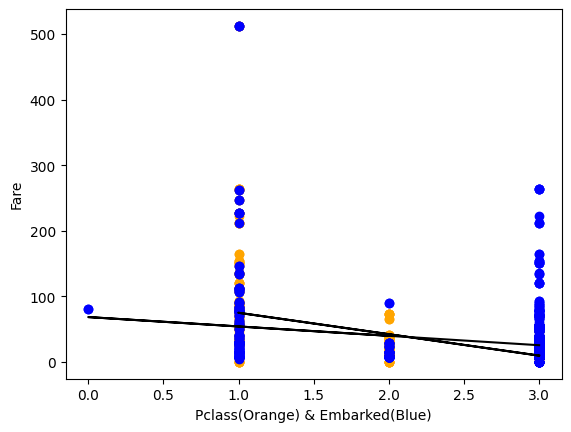

<Axes: xlabel='Embarked - Float', ylabel='Fare'>

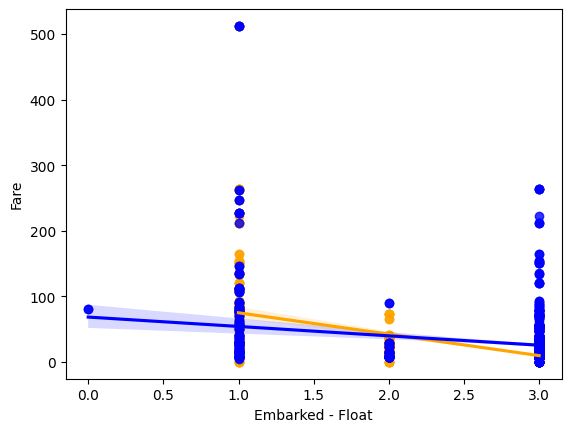

In [7]:
# 'Embarked' values are conevrted into float: C=1; Q=2; S=3

X1 = titanic_train_linear[["Pclass"]]
X2 = titanic_train_linear[["Embarked - Float"]]
y = titanic_train_linear[["Fare"]]

## Scatter Plot
# Pclass vs. Fare
regressor1 = LinearRegression()
regressor1.fit(X1, y)
y_pred = regressor1.predict(X1)
# Embarked vs. Fare
regressor2 = LinearRegression()
regressor2.fit(X2, y)
y_pred = regressor2.predict(X2)
# Pclass vs. Survived
plt.scatter(X1, y, color = 'Orange')
plt.plot(X1, regressor1.predict(X1), color = 'black')
plt.scatter(X2, y, color = 'Blue')
plt.plot(X2, regressor2.predict(X2), color = 'black')
plt.xlabel('Pclass(Orange) & Embarked(Blue)')
plt.ylabel('Fare')
plt.show()

## SNS regplot
sns.regplot(data=titanic_train_linear, x="Pclass", y="Fare", color = "orange")
sns.regplot(data=titanic_train_linear, x="Embarked - Float", y="Fare", color = "blue")


Considering data points displaying a broad variety of fare values, the models show the correlation between the "Embarked" and "Fare" variables. Although most rates are centered at the lower end, there are few outliers with extremely high fares among certain "Embarked" variable values. Potential categorical groups are indicated by the existence of distinct vertical lines among the data points. Despite being visible, the trend line does not appear to adequately depict the diversity in fare pricing, suggesting a poor connection between the variables.


## Polynomial Linear Regression


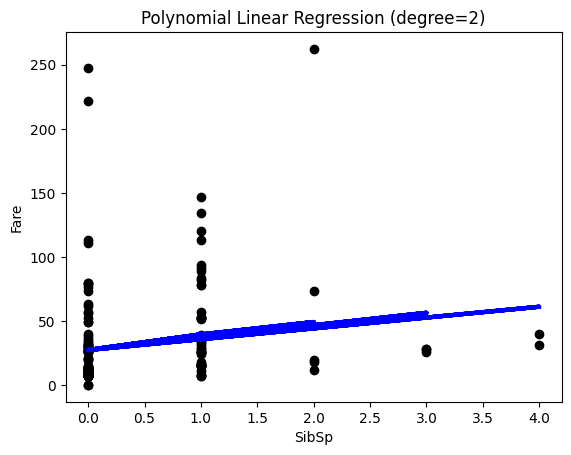

In [27]:
# Assuming your dataset has features X and a target variable y
X = titanic_train_linear[['SibSp']].values  # Assuming you have only one feature 'X'
y = titanic_train_linear['Fare'].values

# Transform input features to polynomial features
poly = PolynomialFeatures(degree=2)  # You can change the degree as per your requirement
X_poly = poly.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Polynomial Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plot the results
plt.scatter(X_test[:, 1], y_test, color='black')
plt.plot(X_test[:, 1], y_pred, color='blue', linewidth=3)
plt.xlabel('SibSp')
plt.ylabel('Fare')
plt.title('Polynomial Linear Regression (degree=2)')
plt.show()

The graph shows data points that show the link between the independent variable "SibSp" and the dependent variable "Fare." The plot is overlaid with a degree 2 polynomial linear regression line, which shows a quadratic relationship between the variables. The polynomial regression line's upward slope indicates a positive trend between the independent variable and "Fare." The polynomial regression line's curve shows that there is a non-linear trend involving the two variables. The 'Fare' variable follows a quadratic pattern rather than a linear one as the independent variable varies. This implies that a curve in comparison with a straight line is the most appropriate way to depict the relationship between X and Y.


## Logistic Regression Algorithm

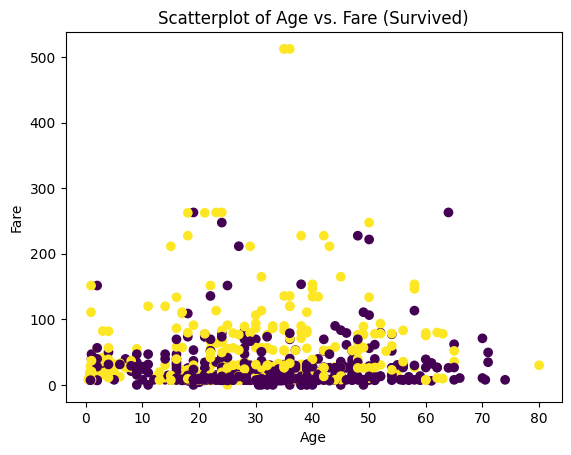

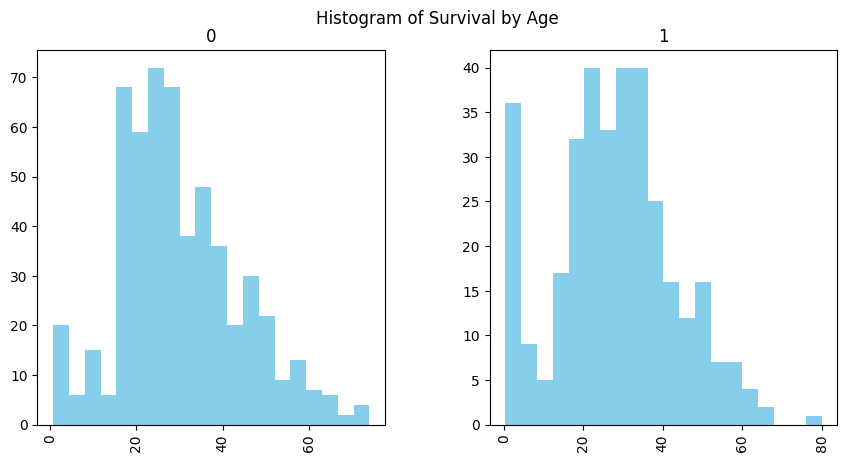

Accuracy: 0.6536312849162011
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.95      0.76       105
           1       0.77      0.23      0.35        74

    accuracy                           0.65       179
   macro avg       0.70      0.59      0.56       179
weighted avg       0.69      0.65      0.59       179



In [8]:
# Scatterplot
plt.scatter(titanic_train['Age'], titanic_train['Fare'], c=titanic_train['Survived'], cmap='viridis')
plt.title('Scatterplot of Age vs. Fare (Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Histogram
titanic_train['Age'].hist(by=titanic_train['Survived'], bins=20, figsize=(10, 5), color=['skyblue'])
plt.suptitle('Histogram of Survival by Age')
plt.show()

# Split the data into (X) and (y)
X = titanic_train[['Age', 'Fare']]
y = titanic_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{class_report}')

When using logistic regression, we are still using a linear model that is used for binary classification problems. This is beneficial for us in this case since the survival of a person is somewhat linear to the gender or passenger class or their fare. We can see in our output that mostly people below the fare of 100 from all different ages had a much significant survival rate than people from other fare groups, 100 and higher. This algorithm was simple to implement and easy to track as well.

## Decision Tree Algorithm

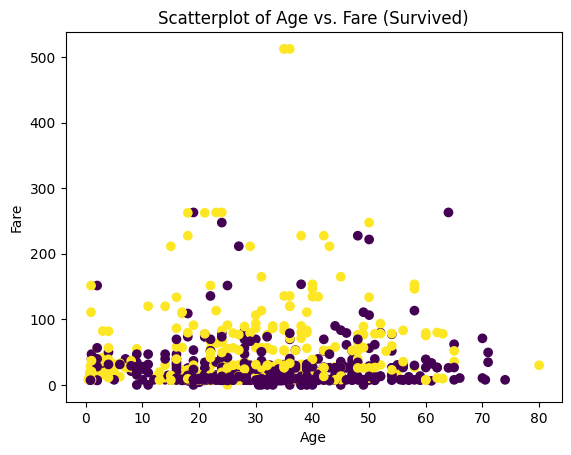

Accuracy: 0.6815642458100558
Confusion Matrix:
[[82 23]
 [34 40]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.78      0.74       105
           1       0.63      0.54      0.58        74

    accuracy                           0.68       179
   macro avg       0.67      0.66      0.66       179
weighted avg       0.68      0.68      0.68       179



In [21]:
# Scatterplot
plt.scatter(titanic_train['Age'], titanic_train['Fare'], c=titanic_train['Survived'], cmap='viridis')
plt.title('Scatterplot of Age vs. Fare (Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Split the data into (X) and (y)
X = titanic_train[['Age', 'Fare']]
y = titanic_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Plot the decision tree using graphviz
dot_data = export_graphviz(model, out_file=None, feature_names=['Age', 'Fare'],
                           class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('decision_tree', format='png', cleanup=True)

# Display the saved image
Image(filename='decision_tree.png')

Decision trees are versatile so we can use this for regression or classification. In our case, we can use it for regression in finding the survival rate of people according to their age, and we can apply classification for see fare groups according to age as well. The implementation of this algorithm compared to the previous was a little more challenging. However, we can see in our output That there was initially two branches, survived and not survived, in this case we can see where the split started, and we can state that there were more casualties than survivors. This was affected by a multitude of reasons as shown in the decision tree.

*To get a better view of the tree, we advise to download the .png file after running the decision tree, the file name is decision_tree.png*.

## Random Forest Algorithm

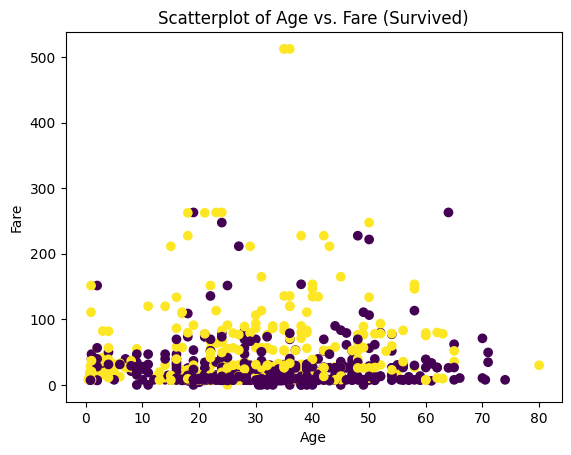

Number of Trees in the Random Forest: 100
Accuracy: 0.6703910614525139
Confusion Matrix:
[[82 23]
 [36 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.74       105
           1       0.62      0.51      0.56        74

    accuracy                           0.67       179
   macro avg       0.66      0.65      0.65       179
weighted avg       0.67      0.67      0.66       179



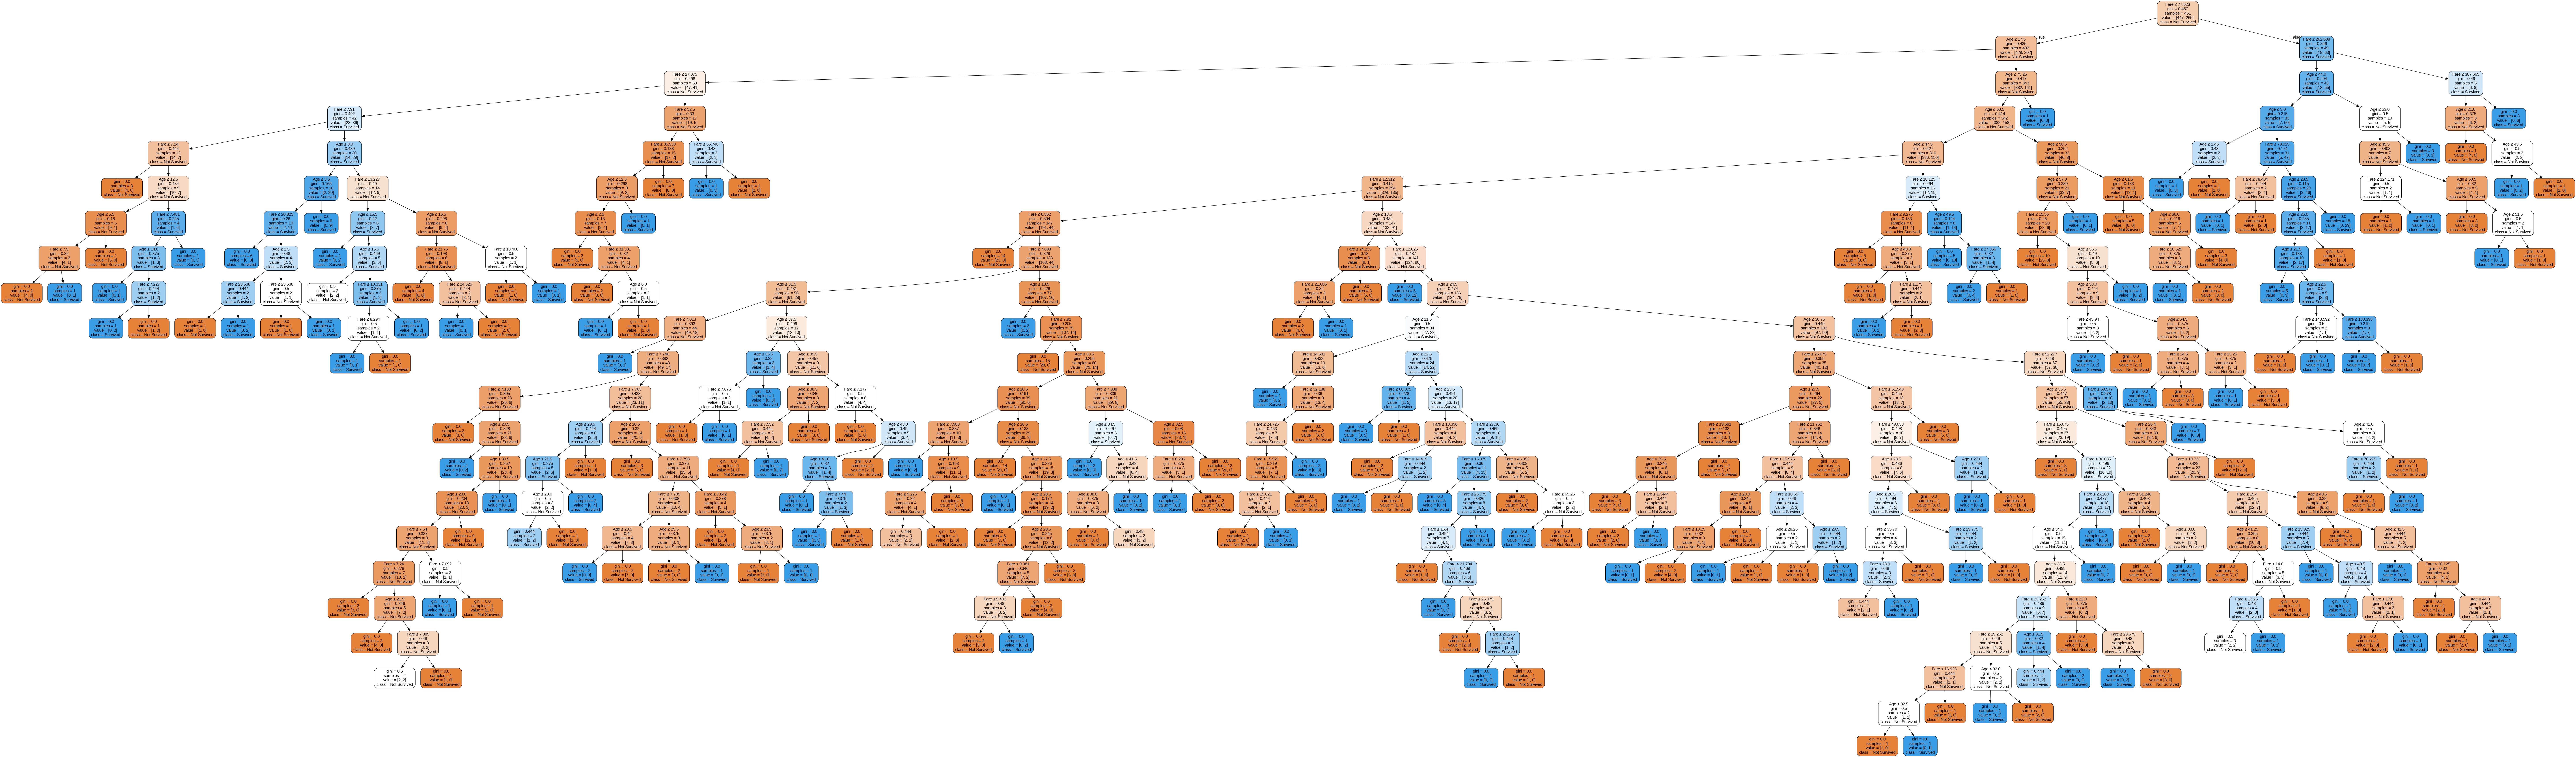

<Figure size 1200x800 with 0 Axes>

In [25]:
# Scatterplot
plt.scatter(titanic_train['Age'], titanic_train['Fare'], c=titanic_train['Survived'], cmap='viridis')
plt.title('Scatterplot of Age vs. Fare (Survived)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

# Split the data into (X) and (y)
X = titanic_train[['Age', 'Fare']]
y = titanic_train['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Get the number of trees in the Random Forest
num_trees = model.n_estimators

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the number of trees
print(f'Number of Trees in the Random Forest: {num_trees}')

# Display the results
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

# Plot one of the decision trees from the Random Forest using graphviz
plt.figure(figsize=(12, 8))
dot_data = tree.export_graphviz(model.estimators_[0], out_file=None, feature_names=['Age', 'Fare'],
                                class_names=['Not Survived', 'Survived'], filled=True, rounded=True, special_characters=True)

graph = graphviz.Source(dot_data)
graph.render('random_forest_tree', format='png', cleanup=True)

# Display the saved image
Image(filename='random_forest_tree.png')


Random forrest algorithm is harder to implement and harder to show how it decides its output. This is because it combines multiple decision tress and combines their outputs together. In our case, we are only showing one of a hundred trees generated by the algo, as stated just below the scatterplot graph. With random forest, we can be sure that there is an increase in the predictive accuracy compared to other algorithms.